### Q1: 3.38

In [1]:
# read csv file 
main_df <- read.csv('ex03-38Diamond.csv', header=T)
dim(main_df)
head(main_df)

[1] 351   6

,Carat,Color,Clarity,Depth,PricePerCt,TotalPrice
,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,1.08,E,VS1,68.6,6693.3,7228.8
2,0.31,F,VVS1,61.9,3159.0,979.3
3,0.31,H,VS1,62.1,1755.0,544.1
4,0.32,F,VVS1,60.8,3159.0,1010.9
5,0.33,D,IF,60.8,4758.8,1570.4
6,0.33,G,VVS1,61.5,2895.8,955.6


#### a

In [2]:
# create quadratic model using Depth
main_df$Depth2 = main_df$Depth^2
model1 = lm(TotalPrice~Depth+Depth2, data=main_df)
summary(model1)


Call:
lm(formula = TotalPrice ~ Depth + Depth2, data = main_df)

Residuals:
   Min     1Q Median     3Q    Max 
 -9323  -4251  -2676   2134  45513 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept) -28406.783 112211.790  -0.253    0.800
Depth          766.369   3353.222   0.229    0.819
Depth2          -3.233     24.869  -0.130    0.897

Residual standard error: 7616 on 348 degrees of freedom
Multiple R-squared:  0.04748,	Adjusted R-squared:  0.042 
F-statistic: 8.673 on 2 and 348 DF,  p-value: 0.0002111


$\hat{TotalPrice} = -28406.78 + 766.37 * Depth - 3.23 *  Depth^2$

According to invididual T-tests, none of the covariates are significant for the model. On the other hand, the R-squared value for the model is also very small, therefore, the model does not give good predictions.

#### b

In [3]:
# create a two-predictor model u/ Carat and Depth
model2 = lm(TotalPrice~Carat + Depth, data=main_df)
summary(model2)


Call:
lm(formula = TotalPrice ~ Carat + Depth, data = main_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-9234.7 -1223.7  -274.3  1161.0 16368.6 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1059.24    1918.36   0.552    0.581    
Carat       15087.01     320.96  47.006  < 2e-16 ***
Depth        -134.94      30.92  -4.364 1.68e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2809 on 348 degrees of freedom
Multiple R-squared:  0.8704,	Adjusted R-squared:  0.8696 
F-statistic:  1168 on 2 and 348 DF,  p-value: < 2.2e-16


$\hat{TotalPrice} = 1059.24 + 15087.01 * Carat - 134.94 * Depth$

According to invididual T-tests, Depth and Carat (both) covariates are significant for the model. The R-squared value for the model is colse to one, therefore, the model gives somewhat good predictions.

#### c

In [4]:
# create a three-predictor model that adds interaction for Carat and Depth
model3 = lm(TotalPrice~Carat+Depth+Carat*Depth, data=main_df)
summary(model3)


Call:
lm(formula = TotalPrice ~ Carat + Depth + Carat * Depth, data = main_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-8254.4 -1311.5  -157.2  1131.8 14513.9 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  31171.41    4219.58   7.387 1.13e-12 ***
Carat       -11827.73    3436.47  -3.442 0.000648 ***
Depth         -598.18      65.47  -9.137  < 2e-16 ***
Carat:Depth    408.45      51.96   7.861 4.84e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2592 on 347 degrees of freedom
Multiple R-squared:   0.89,	Adjusted R-squared:  0.889 
F-statistic: 935.7 on 3 and 347 DF,  p-value: < 2.2e-16


$\hat{TotalPrice} = 31171.41 - 11827.73 * Carat - 598.18 * Depth + 408.45 * Carat * Depth$

According to invididual T-tests, all of the covariates, including intercept (${\beta_0}$), Carat, Depth and interation of Carat and Depth are significant for the model. On the other hand, the R-squared value for the model is larger than the model with two-predictor model using Carat and Depth, therefore, the model gives better prediction than (b) 'model2'. 

#### d


In [5]:
# create a complete second-order model u/ Carat and Depth
main_df$Carat2 = main_df$Carat^2
model4 = lm(TotalPrice~Depth+Depth2+Carat+Carat2, data=main_df)
summary(model4)


Call:
lm(formula = TotalPrice ~ Depth + Depth2 + Carat + Carat2, data = main_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-11239.0   -718.9    -45.4    529.2  11186.6 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26444.472  30331.725   0.872    0.384    
Depth        -715.185    906.299  -0.789    0.431    
Depth2          4.459      6.720   0.663    0.507    
Carat        2949.556    736.705   4.004 7.63e-05 ***
Carat2       4431.449    254.864  17.387  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2058 on 346 degrees of freedom
Multiple R-squared:  0.9309,	Adjusted R-squared:  0.9301 
F-statistic:  1165 on 4 and 346 DF,  p-value: < 2.2e-16


$\hat{TotalPrice} = 26444.47 + 2949.56 * Carat + 4431.45 * Carat^2 - 715.19 * Depth + 4.46 * Depth^2$

According to invididual T-tests covariates, Carat and $Carat^2$ are significant for the model. On the other hand, the R-squared value for the model is largest among all other models, therefore, this model gives the best preditions (or explains the data).

I recommend using (c), the three-predictor model using Carat, Depth, and interaction of Carat and Depth to predict total price of diamonds because it has the second largest adjusted R-squared value, 0.89, and all covariates of the model are significant according to individual t-tests.  

### Q2: 4.7

In [6]:
# read csv file 
bb_df <- read.csv('ex04-07BballT.csv', header=T)
dim(bb_df)
head(bb_df)

[1] 14  7

,Game,League,Runs,Margin,Pitchers,Attendance,Time
,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>
1,CHC-ARI,NL,11,5,10,39131,203
2,KCR-CHW,AL,9,3,7,18137,169
3,MIN-DET,AL,13,5,10,29733,201
4,SDP-LAD,NL,7,1,6,52898,179
5,COL-MIA,NL,9,3,10,20096,204
6,CIN-MIL,NL,21,1,10,34517,235


In [7]:
# drop non-quantitative vars
bbq_df = bb_df[,!(names(bb_df) %in% c("Game", "League"))]
head(bbq_df)

,Runs,Margin,Pitchers,Attendance,Time
,<int>,<int>,<int>,<int>,<int>
1,11,5,10,39131,203
2,9,3,7,18137,169
3,13,5,10,29733,201
4,7,1,6,52898,179
5,9,3,10,20096,204
6,21,1,10,34517,235


In [8]:
# create model:
nullmodel = lm(Time~1, bbq_df)
fullmodel = lm(Time~., bbq_df)

scope = list(lower=formula(nullmodel),upper=formula(fullmodel))

In [9]:
# install required packages 
install.packages('SignifReg')
install.packages('olsrr')
library(olsrr)
library(SignifReg)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)


Attaching package: ‘olsrr’


The following object is masked from ‘package:datasets’:

    rivers




###### Backward Elimination

In [10]:
# Backward elimination with - p values
model11 <- SignifReg(fullmodel, scope=scope, direction='backward', alpha=0.05, criterion='p-value', trace=F)
summary(model11)


Call:
lm(formula = Time ~ Pitchers, data = bbq_df)

Residuals:
   Min     1Q Median     3Q    Max 
-20.21 -11.19  -5.25   5.06  31.79 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  124.069     23.412   5.299 0.000189 ***
Pitchers       8.017      2.722   2.946 0.012239 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.52 on 12 degrees of freedom
Multiple R-squared:  0.4197,	Adjusted R-squared:  0.3713 
F-statistic: 8.678 on 1 and 12 DF,  p-value: 0.01224


$\hat{Time} = 124.07 + 8.02 * Pitchers $

###### Stepwise Regression

In [11]:
# Stepwise regression with - p values
model22 <- SignifReg(fullmodel, scope=scope, direction='both', alpha=0.05, criterion='p-value', trace=F)
summary(model22)


Call:
lm(formula = Time ~ Pitchers, data = bbq_df)

Residuals:
   Min     1Q Median     3Q    Max 
-20.21 -11.19  -5.25   5.06  31.79 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  124.069     23.412   5.299 0.000189 ***
Pitchers       8.017      2.722   2.946 0.012239 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.52 on 12 degrees of freedom
Multiple R-squared:  0.4197,	Adjusted R-squared:  0.3713 
F-statistic: 8.678 on 1 and 12 DF,  p-value: 0.01224


$\hat{Time} = 124.07 + 8.02 * Pitchers $

###### Forward Selection

In [12]:
# Forward selection with - p values
model33 <- SignifReg(nullmodel, scope=scope, direction='forward', alpha=0.05, criterion='p-value', trace=F)
summary(model33)


Call:
lm(formula = Time ~ Runs, data = bbq_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-17.670 -11.604  -1.117   7.378  34.330 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  148.043     11.995  12.342 3.53e-08 ***
Runs           4.181      1.081   3.868  0.00224 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.34 on 12 degrees of freedom
Multiple R-squared:  0.5549,	Adjusted R-squared:  0.5178 
F-statistic: 14.96 on 1 and 12 DF,  p-value: 0.002237


$\hat{Time} = 148.04 + 4.18 * Runs $

#### a

$\hat{Time} = 148.04 + 4.18 * Runs $

Using forward selection maximizes the coefficient of determination of the model, $R^2$, at 0.56.

#### b

$\hat{Time} = 148.04 + 4.18 * Runs $

Using forward selection maximizes the adjusted coefficient of determination of the model, adjusted $R^2$, at 0.52.

In [13]:
# null model
ols_mallows_cp(nullmodel, fullmodel)


[1] 13.35821

In [14]:
# adding Pitchers to null model
m1 <- lm(Time~Pitchers, data=bbq_df)

ols_mallows_cp(m1, fullmodel)

[1] 4.716235

In [15]:
# adding Runs to null model
m2 <- lm(Time~Runs, data=bbq_df)

ols_mallows_cp(m2, fullmodel)

[1] 1.28728

In [16]:
# adding Pitchers+Runs (2 vars) to null model
m3 <- lm(Time~Pitchers+Runs, data=bbq_df)

ols_mallows_cp(m3, fullmodel)

[1] 2.681103

In [17]:
# adding Margin to null model
m4 <- lm(Time~Attendance, data=bbq_df)

ols_mallows_cp(m4, fullmodel)

[1] 12.78232

In [18]:
# adding Attendance to null model
m5 <- lm(Time~Margin, data=bbq_df)

ols_mallows_cp(m5, fullmodel)

[1] 14.67027

#### c 

$\hat{Time} = {\beta_0} + {\beta_1} * Runs $

Using the above model minimizes the Mallow's $C_{p}$ at 1.29.

### Q3: 4.8

In [19]:
# read csv file 
df <- read.csv('ex04-08CtyHlth.csv', header=T)
df$sqrt_MDs = sqrt(df$MDs)
dim(df)
head(df)

[1] 53  5

,County,MDs,Hospitals,Beds,sqrt_MDs
,<chr>,<int>,<int>,<int>,<dbl>
1,"Bay, FL",351,3,605,18.734994
2,"Beaufort, NC",95,2,134,9.746794
3,"Beaver, PA",260,2,567,16.124515
4,"Bernalillo, NM",2797,11,1435,52.886671
5,"Bibb, GA",769,5,976,27.730849
6,"Clinton, PA",42,2,245,6.480741


#### a

In [20]:
# Split data into train (n=35) and test (n=18)
set.seed(444) # setting a seed so that you will get the same output as shown in the script
ind <- sample(1:53, 35)

train <- df[ind,]
test  <- df[-ind,]
dim(train)
dim(test)

[1] 35  5

[1] 18  5

In [21]:
# use training sample to fit a model
model = lm(sqrt_MDs~Hospitals, data=train)
summary(model)


Call:
lm(formula = sqrt_MDs ~ Hospitals, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-14.532  -5.170  -1.194   5.620  18.890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4.4993     2.1620  -2.081   0.0453 *  
Hospitals     7.7203     0.4727  16.331   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.68 on 33 degrees of freedom
Multiple R-squared:  0.8899,	Adjusted R-squared:  0.8866 
F-statistic: 266.7 on 1 and 33 DF,  p-value: < 2.2e-16


$ \hat{\sqrt{MDs}} = -4.50 + 7.72 * Hospitals $

#### b


In [22]:
# compute predictions for the holdout/test sample
data = data.frame(Hospitals=test$Hospitals)
pred <- predict(model, newdata=data)
pred

1        2        3        4        5        6        7        8 
18.66165 80.42428 10.94132 10.94132 57.26330 10.94132 88.14461 64.98363 
       9       10       11       12       13       14       15       16 
18.66165 10.94132 10.94132 26.38198 34.10231 26.38198 10.94132 49.54297 
      17       18 
10.94132 10.94132

In [23]:
# find the cross-validation correlation 
cor(pred, test$sqrt_MDs)

[1] 0.9141652

#### c

In [24]:
# compute the shrinkage and comment on it 
R_sq <- 0.9142
sq_r <- cor(pred, test$sqrt_MDs)^2

diff <- R_sq  - sq_r
diff

[1] 0.07850203

This means that the model's accuracy score will decrease by a very little proportion when new data is given to the model for predictions.

### Q4: 4.16

In [25]:
# read csv file 
cat_df <- read.csv('ex04-16Caterp.csv', header=T)
dim(cat_df)
head(cat_df)

[1] 267  18

,Instar,ActiveFeeding,Fgp,Mgp,Mass,LogMass,Intake,LogIntake,WetFrass,LogWetFrass,DryFrass,LogDryFrass,Cassim,LogCassim,Nfrass,LogNfrass,Nassim,LogNassim
,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Y,Y,Y,0.002064,-2.685290,0.165118,-0.7822056,0.000241,-3.617983,0.000208,-3.681937,0.01422378,-1.846985,6.61e-06,-5.179510,0.001858999,-2.730721
2,1,Y,N,N,0.005191,-2.284749,0.201008,-0.6967867,0.000063,-4.200659,0.000061,-4.214670,0.01739189,-1.759653,1.03e-06,-5.986783,0.002270091,-2.643957
3,2,N,Y,N,0.005603,-2.251579,0.189125,-0.7232511,0.001401,-2.853562,0.000969,-3.013676,0.01639923,-1.785177,2.78e-05,-4.555794,0.002302210,-2.637855
4,2,Y,N,N,0.019300,-1.714443,0.283280,-0.5477841,0.002045,-2.689307,0.001834,-2.736601,0.02392468,-1.621154,4.64e-05,-4.333480,0.003041352,-2.516933
5,2,N,Y,Y,0.029300,-1.533132,0.259569,-0.5857472,0.005377,-2.269460,0.003523,-2.453087,0.02122857,-1.673079,9.97e-05,-4.001301,0.002791898,-2.554100
6,3,Y,Y,N,0.062600,-1.203426,0.327864,-0.4843063,0.029500,-1.530178,0.000789,-3.102923,0.02836365,-1.547238,1.84e-05,-4.735567,0.003627464,-2.440397


#### a

In [26]:
# Fit a model to predict log nitrogen assimilation (LogNassim) using log body mass(LogMass).
# Report the value of R^2 for this model.
mod1 = lm(LogNassim~LogMass, data=cat_df)
summary(mod1)


Call:
lm(formula = LogNassim ~ LogMass, data = cat_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.26089 -0.11558  0.02162  0.16725  0.41862 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.88738    0.01841 -102.53   <2e-16 ***
LogMass      0.37096    0.01332   27.85   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2501 on 251 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  0.7555,	Adjusted R-squared:  0.7545 
F-statistic: 775.6 on 1 and 251 DF,  p-value: < 2.2e-16


$ \hat{LogNassim} = -1.89 + 0.37 * LogMass $

$ R^2-value = 0.756 $

#### b

In [42]:
# Fit a model to predict LogNassim using appropriate indicators for the categories of Instar.
# Report the value of R^2 for this model and compare it to (a)
table(cat_df$Instar)
factor(cat_df$Instar)
mod2 = lm(LogNassim~factor(Instar), data=cat_df)
summary(mod2)


 1  2  3  4  5 
51 41 45 64 66 

[1] 1 1 2 2 2 3 3 4 4 4 4 5 5 5 5 1 1 1 2 2 3 3 3 4 4 4 5 5 5 5 5 1 1 1 1 2 2
 [38] 2 3 3 3 4 4 4 4 5 5 5 5 1 1 1 1 2 2 3 3 3 4 4 4 4 5 5 5 5 1 1 1 2 2 3 3 3
 [75] 3 4 4 4 5 5 5 5 1 1 1 2 2 2 3 3 4 4 4 4 5 5 5 5 1 1 1 2 2 3 3 4 4 4 4 5 5
[112] 5 5 1 1 1 2 2 3 3 3 4 4 4 5 5 5 1 1 1 2 2 2 3 3 3 4 4 4 4 5 5 5 1 1 2 2 2
[149] 3 3 4 4 4 4 5 5 5 1 1 1 2 2 2 3 3 4 4 4 4 5 5 5 5 1 1 1 2 2 3 3 3 4 4 4 4
[186] 5 5 5 5 1 1 1 2 2 3 3 3 4 4 4 5 5 5 5 5 1 1 1 2 2 2 3 3 3 4 4 4 4 5 5 5 5
[223] 1 1 1 2 2 3 3 3 4 4 4 4 5 5 5 5 1 1 1 2 2 3 3 4 4 4 4 5 5 5 5 1 1 1 2 2 3
[260] 3 4 4 4 4 5 5 5
Levels: 1 2 3 4 5


Call:
lm(formula = LogNassim ~ factor(Instar), data = cat_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.08300 -0.06971  0.01542  0.10938  0.51487 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.72292    0.03270 -83.261  < 2e-16 ***
factor(Instar)2  0.15076    0.04625   3.260  0.00127 ** 
factor(Instar)3  0.30615    0.04495   6.811 7.27e-11 ***
factor(Instar)4  0.69102    0.04169  16.576  < 2e-16 ***
factor(Instar)5  1.24924    0.04169  29.966  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2068 on 248 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  0.8348,	Adjusted R-squared:  0.8322 
F-statistic: 313.4 on 4 and 248 DF,  p-value: < 2.2e-16


$ \hat{LogNassim} = -2.72 + 0.15 * (Instar==2) + 0.31 * (Instar==3) + 0.69 * (Instar==4) + 1.25 * (Instar==5)$

$ R^2-value = 0.835 $

The R-squared value of model in (b) is larger than that of model in (a), therefore, suggesting that this model better explains the observed data.

##### c

First coefficient: This means that when Instar == 0 (base case, caterpillars in development stage 1), the log of  nitrogen assilinlation will decrease by -2.72.

Second coefficient: This means that when Instar == 1 (caterpillars in development stage 2), the log of  nitrogen assilinlation will decrease by (-2.72 + 0.15) -2.57.

##### d

In [29]:
# Fit a model to predict LogNassim using LogMass and appropriate indicators for Instar.
# Report the value of R^2 and compare it to the earlier models.
mod3 = lm(LogNassim~ LogMass + factor(Instar), data=cat_df)
summary(mod3)


Call:
lm(formula = LogNassim ~ LogMass + factor(Instar), data = cat_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.09910 -0.06945  0.01555  0.10943  0.49154 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -2.56744    0.11702 -21.939  < 2e-16 ***
LogMass          0.06148    0.04444   1.384  0.16776    
factor(Instar)2  0.10206    0.05805   1.758  0.07998 .  
factor(Instar)3  0.21480    0.07983   2.691  0.00761 ** 
factor(Instar)4  0.54611    0.11270   4.846 2.23e-06 ***
factor(Instar)5  1.04876    0.15077   6.956 3.12e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2065 on 247 degrees of freedom
  (14 observations deleted due to missingness)
Multiple R-squared:  0.8361,	Adjusted R-squared:  0.8328 
F-statistic:   252 on 5 and 247 DF,  p-value: < 2.2e-16


$ \hat{LogNassim} = -2.57 + 0.06 * LogMass + 0.10 * (Instar==2) + 0.21 * (Instar==3) + 0.55 * (Instar==4) + 1.05 * (Instar==5)$

$ R^2-value = 0.836 $

The R-squared value of this model is very close to the model in (b), therefore, suggesting that both the models in (b) and (d) explains the observed data similarly and better than the model in (a).

##### e

No, the variable 𝐿𝑜𝑔𝑀𝑎𝑠𝑠 is not needed in the model in (d) to make good predictions. According to individual T-test, the p-value of the covariate, 𝐿𝑜𝑔𝑀𝑎𝑠𝑠, is > 0.05.

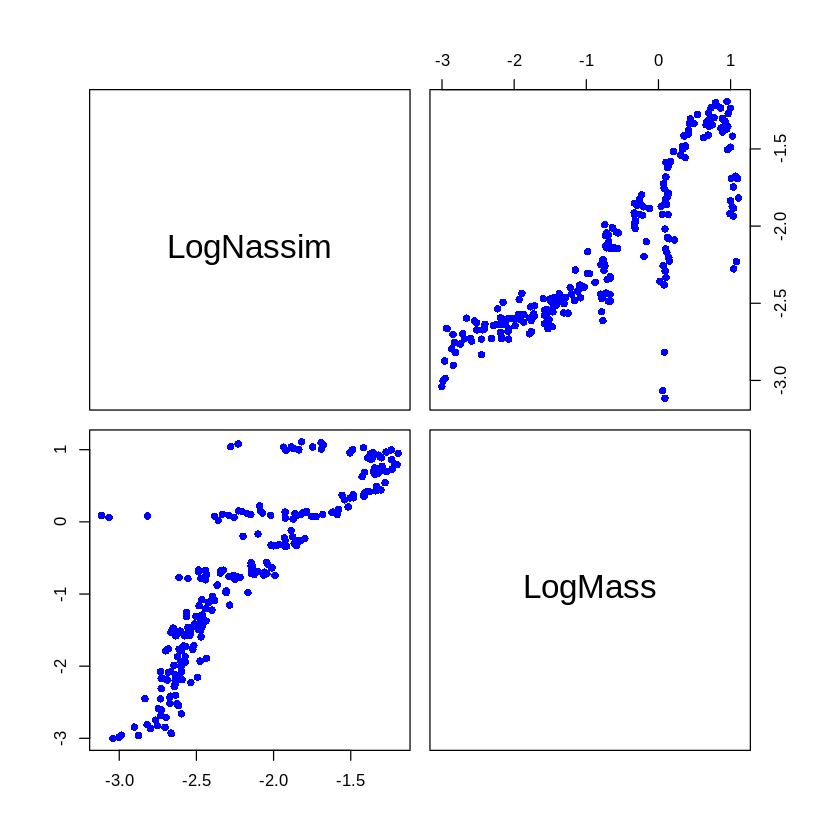

In [31]:
# formal test
# LogNassim vs LogMass (numeric)
tempdt1 <- cat_df[,c('LogNassim', 'LogMass')]
pairs(tempdt1, pch=16, col='blue')

The scatter-plot shows large number of outliers at 𝐿𝑜𝑔𝑀𝑎𝑠𝑠 = 0 and also at 𝐿𝑜𝑔𝑀𝑎𝑠𝑠 = 1.

##### f

Yes, we can use all (four) indicators or use three indicators, excluding indicator for Instar==2, for the variable Instar. According to individual T-test, the p-value of the indicator for Instar==2 is slightly > 0.05.

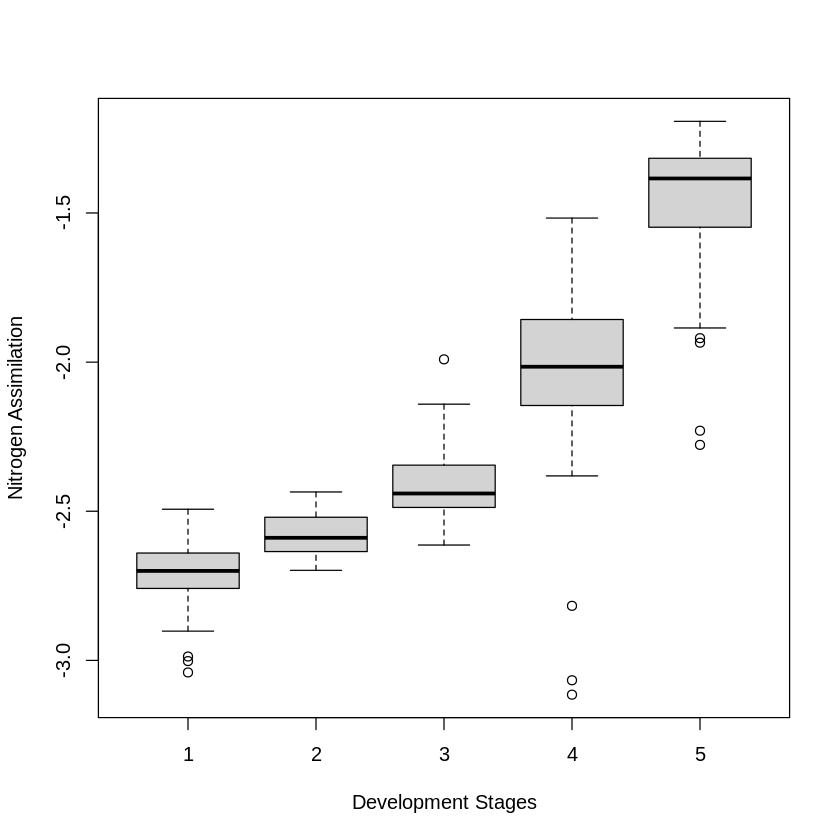

In [40]:
# formal test
# LogNassim vs Instar (category) 
tempdt2 <- cat_df[,c('LogNassim', 'Instar')]
boxplot(tempdt2$LogNassim~tempdt2$Instar, ylab='Nitrogen Assimilation', xlab='Development Stages')

There is a small overlap between the categories, Instar==1 and Instar==2. Other than that, none of the categories, Instar==1-5, overlap with each other.